In [35]:
from scipy.interpolate import make_interp_spline

import pandas as pd
import glob
from utils import convert_csv_to_graph
from network import get_network_stats
import networkx as nx
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from utils import smooth
from scipy import stats
from data import get_MIM_df, get_SFP_df

sns.set_style('darkgrid')  # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text

palette = sns.color_palette()



In [36]:


MIM_model_df, MIM_agent_df = get_MIM_df(0)
SFP_df = get_SFP_df()

MIM_y1 = MIM_model_df['average_opinion_all']
MIM_y2 = MIM_model_df['average_opinion_left']
MIM_y3 = MIM_model_df['average_opinion_right']

SFP_y1 = SFP_df['average_opinion_all']
SFP_y2 = SFP_df['average_opinion_left']
SFP_y3 = SFP_df['average_opinion_right']
SFP_y4 = SFP_df['polarization']


x = np.linspace(0, 1000, 1000)


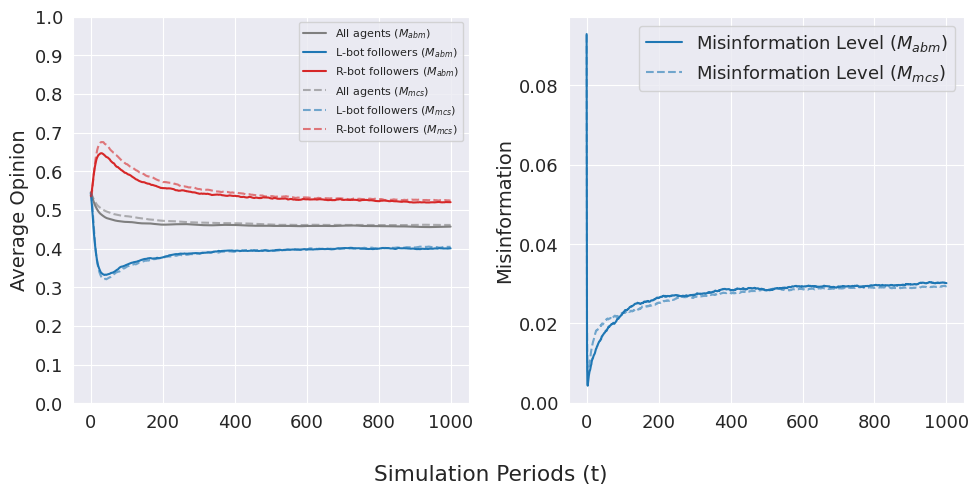

In [61]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

# fig.tight_layout()

spl1 = make_interp_spline(x, MIM_y1)
spl2 = make_interp_spline(x, MIM_y2)
spl3 = make_interp_spline(x, MIM_y3)

ax[0].plot(x, smooth(MIM_y1, 0.90), '-', color=palette[7], label=r"All agents ($M_{abm}$)")
ax[0].plot(x, smooth(MIM_y2, 0.90), '-', color=palette[0], label=r"L-bot followers ($M_{abm}$)")
ax[0].plot(x, smooth(MIM_y3, 0.90), '-', color=palette[3], label=r"R-bot followers ($M_{abm}$)")

ax[0].plot(x, smooth(SFP_y1, 0.90), '--', color=palette[7], label=r"All agents ($M_{mcs}$)", alpha=0.6)
ax[0].plot(x, smooth(SFP_y2, 0.90), '--', color=palette[0], label=r"L-bot followers ($M_{mcs}$)", alpha=0.6)
ax[0].plot(x, smooth(SFP_y3, 0.90), '--', color=palette[3], label=r"R-bot followers ($M_{mcs}$)", alpha=0.6)


# ax.axhline(0.5, lw=5, label='ground truth', alpha=0.2)

# ax[0].set_xticks(np.arange(0, 1100, 100))
ax[0].set_yticks(np.arange(0.0, 1.1, 0.1))
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('Average Opinion')
# ax[0].set_xlabel('Simulation Periods')
#plt.title(label='Replication (MIM) vs Original (SFP)')
ax[0].legend(loc='best',prop={'size': 8})



ax[1].plot(x, smooth(MIM_model_df['misinformation'], 0.0), color=palette[0], label=r'Misinformation Level ($M_{abm}$)')
ax[1].plot(x, smooth(SFP_df['misinformation'], 0.0), '--',  color=palette[0], label=r'Misinformation Level ($M_{mcs}$)', alpha=0.6)
ax[1].set_ylabel('Misinformation')
# ax[1].set_xlabel('simulation periods')
ax[1].legend(loc='best')

fig.supxlabel('Simulation Periods (t)')

plt.tight_layout()
plt.savefig('data/graphs/MIM_vs_SFP_op.png', dpi=500)


In [38]:
from sklearn.metrics import mean_squared_error

RMSE_1 = mean_squared_error(SFP_y1, MIM_y1, squared=False) 
RMSE_2 = mean_squared_error(SFP_y2, MIM_y2, squared=False)
RMSE_3 = mean_squared_error(SFP_y3, MIM_y3, squared=False)



NRMSE_1 = mean_squared_error(SFP_y1, MIM_y1, squared=False) / (SFP_y1.max() - SFP_y1.min()) 
NRMSE_2 = mean_squared_error(SFP_y2, MIM_y2, squared=False) / (SFP_y2.max() - SFP_y2.min())
NRMSE_3 = mean_squared_error(SFP_y3, MIM_y3, squared=False) / (SFP_y3.max() - SFP_y3.min())



print(RMSE_1)
print(RMSE_2)
print(RMSE_3)

print()

print(NRMSE_1)
print(NRMSE_2)
print(NRMSE_3)





0.007300762635720991
0.005225604696628055
0.012850333882644355

0.08575869292702479
0.022136096156372572
0.07225304028531288
